In [2]:
import pandas as pd
from Bio import SeqIO
import re
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from glob import glob
import statistics

In [3]:
getorf_path = 'analysis_results/getorf_output.fasta'

In [4]:
def parse_fasta_to_df(fasta_file):
    sequences = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequences.append((record.id, str(record.seq)))

    df = pd.DataFrame(sequences, columns=["orf_name", "seq"])

    def remove_last_number(s):
        return re.sub(r"_(\d+)$", "", s)

    df['contig'] = df['orf_name'].apply(lambda x: remove_last_number(x))
    df["SRR"] = df["contig"].str.extract(r"_([A-Za-z0-9]+)$")
    df['seq_len'] = df['seq'].apply(len)

    columns = ['SRR', 'contig', 'orf_name', 'seq', 'seq_len']
    df = df[columns]
    return df

In [5]:
getorf = parse_fasta_to_df(getorf_path)
getorf.to_csv('../whole_orf/data/getorf_stats.csv', index=False)

In [13]:
getorf.groupby('SRR').size().sort_values(ascending=False).head()

SRR
SRR6846476    3198
SRR1781945      99
SRR8554352      85
SRR1782579      82
SRR4242136      76
dtype: int64

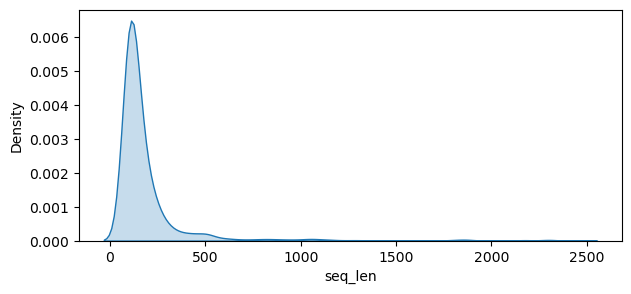

In [7]:
fig, ax = plt.subplots(figsize=(7,3))
fig = sns.kdeplot(getorf.seq_len, fill=True)

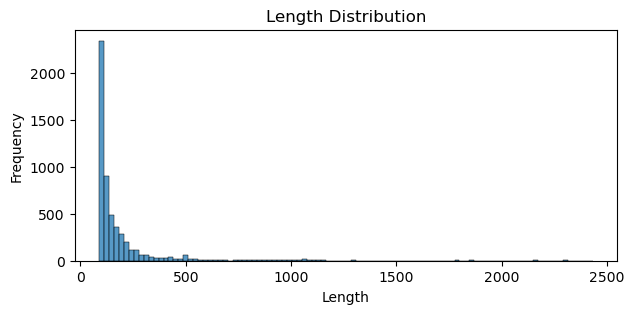

In [8]:
# Plot the length distribution
plt.figure(figsize=(7, 3))
sns.histplot(data=getorf, x='seq_len', bins=100)
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Group by SRR and count rows
counts_per_SRR = getorf.groupby('SRR').size().reset_index(name='count')

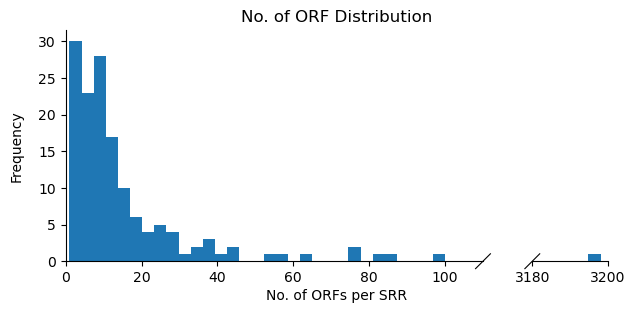

In [29]:
# Create a figure and add a subplot
fig = plt.figure(figsize=(7, 3))

# Create a brokenaxes object
bax = brokenaxes(xlims=((0, 110), (3180, 3200)), fig=fig)

# Plot the histogram
bax.hist(counts_per_SRR['count'], histtype='bar', bins=1000)
bax.set_title('No. of ORF Distribution')
bax.set_xlabel('No. of ORFs per SRR', labelpad=20)
bax.set_ylabel('Frequency')

plt.show()